# Informações do projeto e informações sobre mim.

PT: "Hello World" do Aprendizado de Máquinas. Apesar de ter começado a estudar python, ciência de dados e afins a partir do segundo semestre de 2022, este é o meu primeiro projeto.

Farei apenas o básico, para praticar o que eu vi em cursos e li em livros.
Pode ser um motivo bem bobo, mas eu resolvi não utilizar pipelines e nem nada tão complexo como feature engineering. O motivo? Para praticar as coisas básicas. Se é melhor? Não sei, mas ao ler o código e ter que digitá-lo várias vezes um por um faz bastante sentido na hora da pratica.

EN: The "Hello World" of Machine Learning. Although I started studying Python, data science, and related fields in the second semester of 2022, this is my first project.

I've chosen to tackle only the basics, aiming to practice what I've learned from courses and books. It might seem like a simple reason, but I decided not to use pipelines or anything too complex like feature engineering. Why? For practice the basics. I don't know if it's the most effective approach, but reading and typing the code several times makes sense to me in the context of hands-on practice.

- **survival**: Sobrevivência (0 = No, 1 = Yes) // output
- **pclass**: Classe do bilhete (1 = 1st, 2 = 2nd, 3 = 3rd)
- **sex**: Gênero
- **age**: Idade em anos
- **sibsp**: # de irmãos/cônjuges a bordo do Titanic
- **parch**: # de pais/filhos a bordo do Titanic
- **ticket**: Número do bilhete
- **fare**: Tarifa do passageiro
- **cabin**: Número da cabine
- **embarked**: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)


# Importando as bibliotecas e analisando os dados.

In [ ]:
# Importação das bibliotecas que serão utilizadas ao longo do projeto

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind


from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, roc_auc_score


%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Importando os dados de treino e teste
df_treino = pd.read_csv('train.csv')
df_teste = pd.read_csv('test.csv')

In [ ]:
# Visualizando as 5 primeiras linhas dos dados de treino
df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Visualizando as 5 primeiras linhas dos dados de teste
df_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Visualizando as informações gerais dos dados de treino
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Visualizando as informações gerais dos dados de teste
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# EDA

In [ ]:
# Visualizando as principais informações estatísticas sobre o nosso conjunto de dados de treino.
df_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Visualizando a correlação entre as variáveis
df_treino.corr()

<ipython-input-80-1daa6e43fe24>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_treino.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


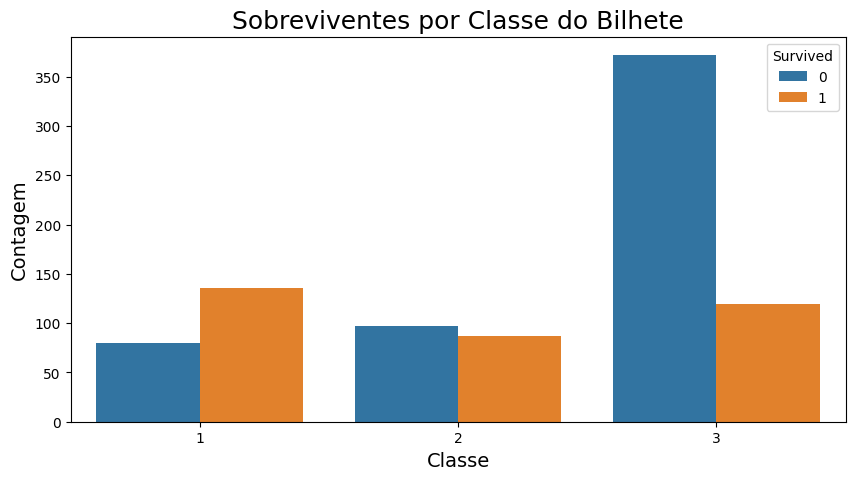

In [ ]:
# Plotando um gráfico que mostra a relação entre a classe e a sobrevivência
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data = df_treino)
ax.figure.set_size_inches(10,5)
ax.set_title('Sobreviventes por Classe do Bilhete', fontsize = 18)
ax.set_xlabel('Classe', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14)
ax = ax

A classe 1 teve muito mais sobreviventes do que não sobreviventes.

A classe 2 teve um pouco mais de não sobreviventes do que de sobreviventes.

Na classe 3 tiveram muito mais não sobreviventes do que de sobreviventes.

Conclusão: A partir da visualização gráfica, as pessoas que estavam na primeira classe sobreviveram mais que as outras duas classes. Só poderemos afirmar de fato se foi isto que aconteceu a partir de testes de hipótese.

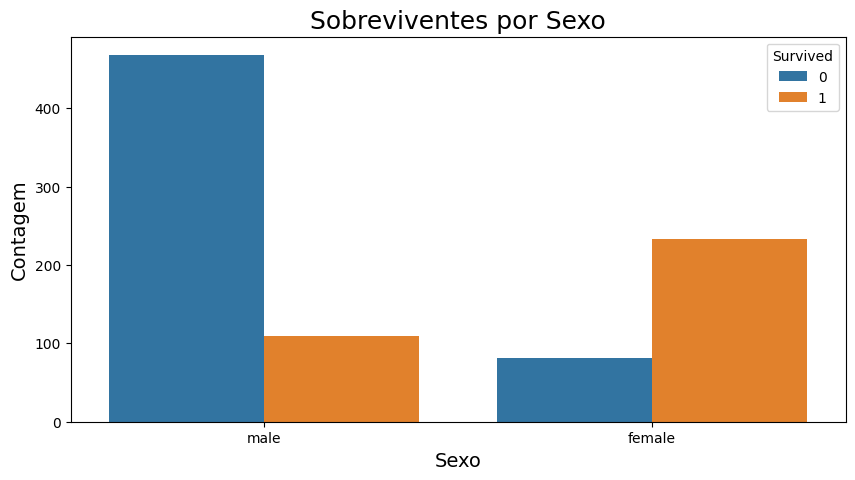

In [ ]:
# Plotando um gráfico que mostra a relação entre o sexo e a sobrevivência.
ax = sns.countplot(x = 'Sex', hue = 'Survived', data = df_treino)
ax.figure.set_size_inches(10,5)
ax.set_title('Sobreviventes por Sexo', fontsize = 18)
ax.set_xlabel('Sexo', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14)
ax = ax

Como visto no filme do Titanic, mulheres eram prioridades no barco de salva vidas. O gráfico mostra isso. Mulheres sobreviveram bem mais do que os homens.

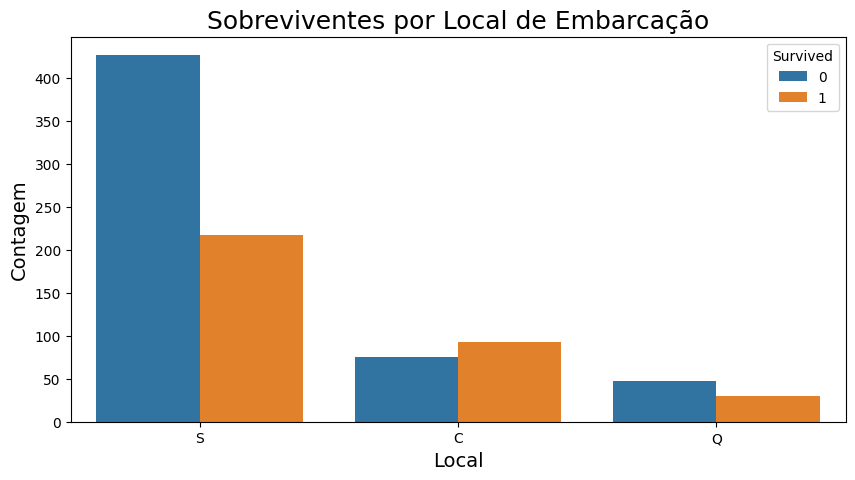

In [ ]:
# Plotando um gráfico que mostra a relação entre o local de embarcação e a sobrevivência.
ax = sns.countplot(x = 'Embarked', hue = 'Survived', data = df_treino)
ax.figure.set_size_inches(10,5)
ax.set_title('Sobreviventes por Local de Embarcação', fontsize = 18)
ax.set_xlabel('Local', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14)
ax = ax

In [ ]:
# Visualizando a frequência de cada lugar de embarcação.
df_treino['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

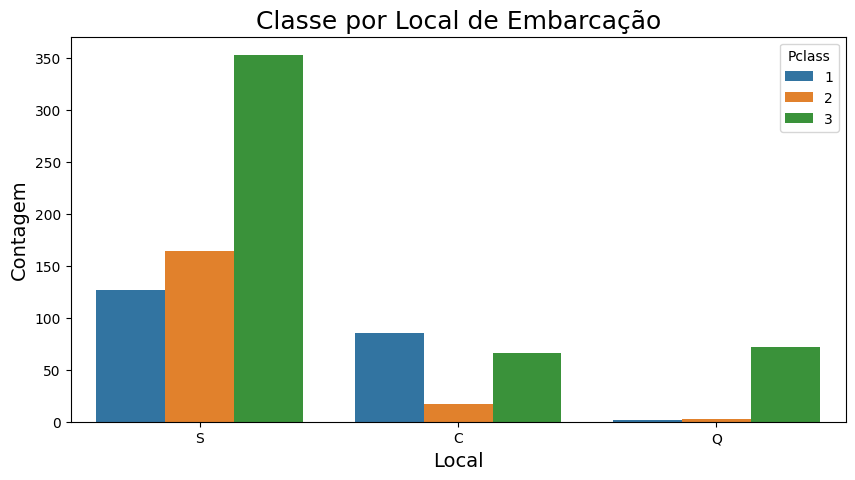

In [ ]:
ax = sns.countplot(x = 'Embarked', hue = 'Pclass', data = df_treino)
ax.figure.set_size_inches(10,5)
ax.set_title('Classe por Local de Embarcação', fontsize = 18)
ax.set_xlabel('Local', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 14)
ax = ax

Aqui temos um gráfico que mostra no eixo X o local de embarcação e a legenda que mostra as classes. Podemos ver que no local de embarcação "S", houveram muitas pessoas da terceira classe, enquanto poucos da segunda e menos ainda da primeiro. Já no local de embarcação "C", Houveram mais pessoas da primeira classe, poucas da segunda classe e relativamente bastante da terceira classe. No "Q", houveram muito poucos da primeira e segunda classe, sendo majoritariamente da terceira classe.

Não é uma grande informação.

In [ ]:
# Visualizando uma tabela cruzada com algumas informações
crosstabs = pd.crosstab(index=df_treino['Survived'], columns=[df_treino['Pclass'], df_treino['Embarked']], margins=True)
crosstabs

Pclass     1           2           3           All
Embarked   C  Q    S   C  Q    S   C   Q    S     
Survived                                          
0         26  1   53   8  1   88  41  45  286  549
1         59  1   74   9  2   76  25  27   67  340
All       85  2  127  17  3  164  66  72  353  889

Text(0, 0.5, 'Contagem')

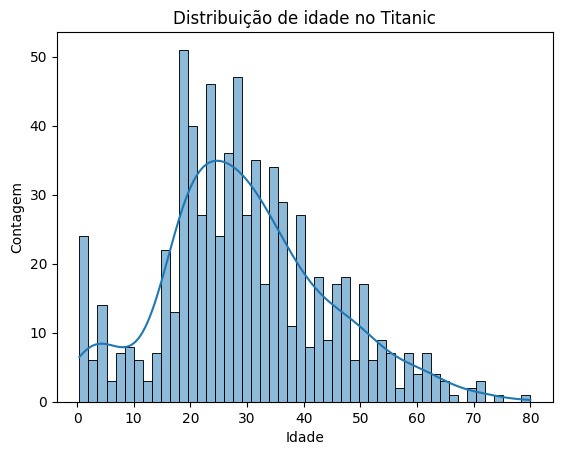

In [ ]:
# Plotando a distribuição de Idade nos dados do titanic.
ax = sns.histplot(df_treino['Age'], bins = 50, kde = True)
ax.set_title('Distribuição de idade no Titanic')
ax.set_xlabel('Idade')
ax.set_ylabel('Contagem')

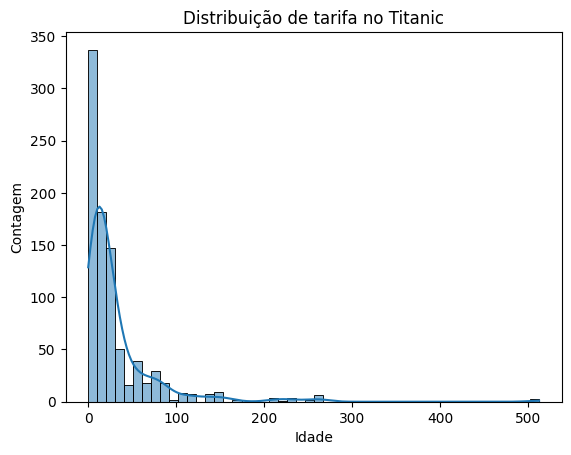

In [ ]:
# Plotando a distribuição de tarifa nos dados do titanic.
sns.histplot(df_treino['Fare'], bins=50, kde=True)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição de tarifa no Titanic')
plt.show()

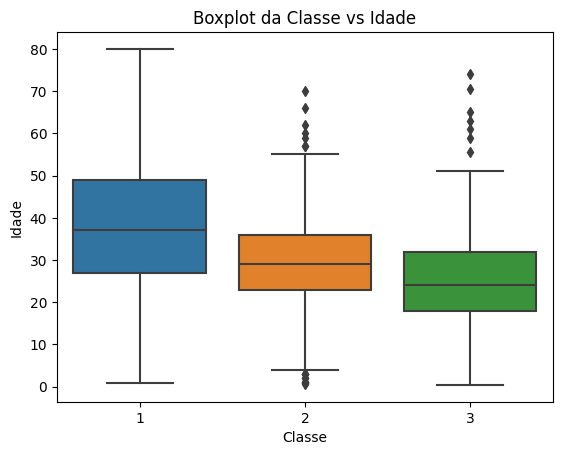

In [ ]:
# Plotando um boxplot que mostra a relação classe e idade.
sns.boxplot(x='Pclass', y='Age', data=df_treino)
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.title('Boxplot da Classe vs Idade')
plt.show()

Interessante. Aparentemente, quanto maior a idade, "melhor" será a classe da pessoa. As pessoas mais jovens estão na classe 3, enquanto as pessoas mais velhas estão na classe 1.

Vamos utilizar um teste de hipótese para testar essa afirmação.

In [ ]:
# Vamos dropar os valores nulos para que não tenha o problema do nan na nossa base de dados
dados_t_test = df_treino[['Pclass', 'Age']].dropna()

# Vamos dividir os dados em grupos com base na classe e utilizando a Idade
grupo_1 = dados_t_test[dados_t_test['Pclass'] == 1]['Age']
grupo_2 = dados_t_test[dados_t_test['Pclass'] == 2]['Age']
grupo_3 = dados_t_test[dados_t_test['Pclass'] == 3]['Age']

# Vamos executar agora o teste t para amostras independentes
resultado_t_test_1_2 = ttest_ind(grupo_1, grupo_2)
resultado_t_test_1_3 = ttest_ind(grupo_1, grupo_3)
resultado_t_test_2_3 = ttest_ind(grupo_2, grupo_3)

# Mostrando os resultados do teste de hipótese
print("Resultado do teste t entre Pclass 1 e Pclass 2:")
print("Estatística t:", resultado_t_test_1_2.statistic)
print("P-valor:", resultado_t_test_1_2.pvalue)
if resultado_t_test_1_2.pvalue < 0.05:
    print("As idades das classes são diferentes.")
else:
    print("As idades das classes não são diferentes.")

print()

print("Resultado do teste t entre Pclass 1 e Pclass 3:")
print("Estatística t:", resultado_t_test_1_3.statistic)
print("P-valor:", resultado_t_test_1_3.pvalue)
if resultado_t_test_1_3.pvalue < 0.05:
    print("As idades das classes são diferentes.")
else:
    print("As idades das classes não são diferentes.")

print()

print("Resultado do teste t entre Pclass 2 e Pclass 3:")
print("Estatística t:", resultado_t_test_2_3.statistic)
print("P-valor:", resultado_t_test_2_3.pvalue)
if resultado_t_test_2_3.pvalue < 0.05:
    print("As idades das classes são diferentes.")
else:
    print("As idades das classes não são diferentes.")


Resultado do teste t entre Pclass 1 e Pclass 2:
Estatística t: 5.485187676773201
P-valor: 7.835568991415144e-08
As idades das classes são diferentes.

Resultado do teste t entre Pclass 1 e Pclass 3:
Estatística t: 10.849122601201033
P-valor: 6.134470007830625e-25
As idades das classes são diferentes.

Resultado do teste t entre Pclass 2 e Pclass 3:
Estatística t: 3.927800191020872
P-valor: 9.715078600777852e-05
As idades das classes são diferentes.


Vemos a partir do teste de hipótese então que realmente as idades são diferentes entre as classes.

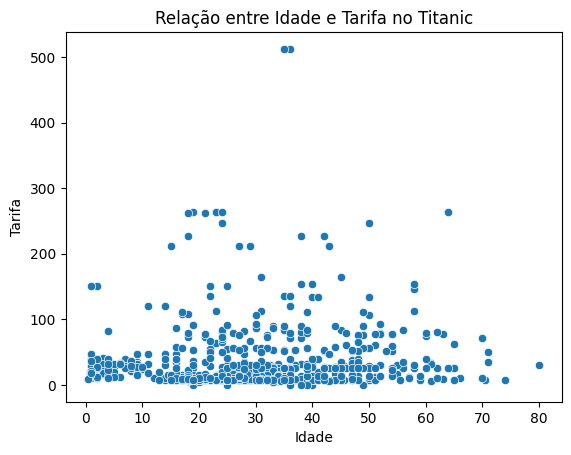

In [ ]:
# Plotando um scatterplot para verificar a relação entre as variáveis continuas idade e tarifa.
sns.scatterplot(x='Age', y='Fare', data=df_treino)
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.title('Relação entre Idade e Tarifa no Titanic')
plt.show()

# Tratando valores nulos e excluindo algumas variáveis nos dados de treino

Vamos fazer o tratamento dos dados

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Usando a mediana para preencher os valores faltantes da Idade
df_treino['Age'].fillna(df_treino['Age'].median(), inplace=True)

In [ ]:
# Dropando a coluna "Cabine"
df_treino.drop('Cabin', axis = 1, inplace = True)

In [ ]:
# Dropando a coluna "PassengerId"
df_treino.drop('PassengerId', axis = 1, inplace = True)

In [ ]:
# Dropando a coluna "Embarked"
df_treino.drop('Embarked', axis = 1, inplace = True)

In [ ]:
# Dropando a coluna "Name"
df_treino.drop('Name', axis = 1, inplace = True)

In [ ]:
# Transformando a variável Sex para uma variável 0 ou 1 para que possamos
# Trabalhar nela.
df_treino['Sex'] = df_treino['Sex'].map({'male': 1, 'female': 0})

In [ ]:
# Verificando as 5 primeiras linhas.
df_treino.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,1,22.0,1,0,A/5 21171,7.2500
1,1,1,0,38.0,1,0,PC 17599,71.2833
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250
3,1,1,0,35.0,1,0,113803,53.1000
4,0,3,1,35.0,0,0,373450,8.0500


In [ ]:
# Dropando a variável Ticket.
df_treino.drop('Ticket', axis = 1, inplace = True)

Machine Learning é um processo. Entender o modelo, testar o modelo e analisar o modelo são alguns dos processos necessários. Após ter feito estes processos, você irá querer voltar e entender o modelo, testar o modelo e analisar o modelo novamente. É um ciclo. E neste ciclo você irá aprimorando o modelo.

Neste primeiro momento, eu apenas droparei algumas colunas que me parecem inúteis, sem me preocupar em verificar a significância de cada uma, de que forma cada uma contribui no meu modelo e etc. Começaremos de forma simples.

In [ ]:
# Separando os dados
X_treino = df_treino.drop('Survived', axis = 1)
y_treino = df_treino['Survived'].copy()

In [ ]:
X_treino

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [ ]:
y_treino

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Machine Learning - Decision Tree Classifier

Começando no aprendizado de maquinas

In [ ]:
# Armazenando o classificador dentro de uma variável e ajustando-o
# Aos meus dados de treino
arvore_decisao_classificador = DecisionTreeClassifier(random_state = 24)
arvore_decisao_classificador = arvore_decisao_classificador.fit(X_treino, y_treino)

In [ ]:
# Fazendo uma predição da linha 10
arvore_decisao_classificador.predict(X_treino.iloc[[10]])

array([1])

In [ ]:
# Verificando
# Ele de fato acertou
y_treino.iloc[10]

1

In [ ]:
# Vendo as features mais importantes do meu modelo.
df_importancia = pd.DataFrame({'Feature': X_treino.columns, 'Importancia': arvore_decisao_classificador.feature_importances_})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)
df_importancia

,Feature,Importancia
1,Sex,0.310881
5,Fare,0.257791
2,Age,0.244309
0,Pclass,0.109315
3,SibSp,0.046455
4,Parch,0.031250


In [ ]:
# Verificando a acurácia do modelo através da validação cruzada.
cross_val_score(arvore_decisao_classificador, X_treino, y_treino, cv=5, scoring = 'accuracy')

array([0.73737374, 0.79124579, 0.76430976])

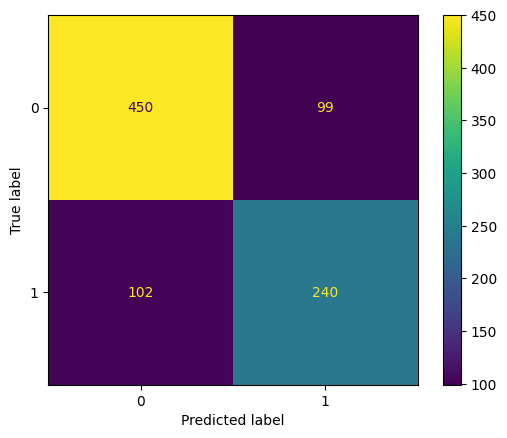

In [ ]:
# Realizando uma predição e plotando a matriz de confusão
y_treino_predito_ad = cross_val_predict(arvore_decisao_classificador, X_treino, y_treino, cv = 5)

matriz_confusao = confusion_matrix(y_treino, y_treino_predito_ad)
matriz_confusao = ConfusionMatrixDisplay(matriz_confusao)
matriz_confusao.plot()

###### DIFERENTES MÉTRICAS

In [ ]:
# Vendo as melhores métricas
print(f'Classification report para Árvore de Decisão:\n {classification_report(y_treino, y_treino_predito_ad)}')

Classification report para Árvore de Decisão:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       549
           1       0.71      0.70      0.70       342

    accuracy                           0.77       891
   macro avg       0.76      0.76      0.76       891
weighted avg       0.77      0.77      0.77       891



# Otimização de hiperparâmetros

In [ ]:
espaco_de_parametros = {
    "max_depth" : [3, 5, 10],
    "min_samples_split" : [8, 16, 32, 64, 128],
    "min_samples_leaf" : [8, 16, 32, 64, 128],
    "criterion" : ["gini", "entropy"]}

grid_search = GridSearchCV(DecisionTreeClassifier(),
                           espaco_de_parametros,
                           cv = 5,
                           scoring = 'accuracy')

grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'min_samples_leaf': [8, 16, 32, 64, 128],
                         'min_samples_split': [8, 16, 32, 64, 128]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 8}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=8)

In [ ]:
resultados = pd.DataFrame(grid_search.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002139,0.000768,0.001378,0.000351,gini,3,8,8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.821229,0.814607,0.814607,0.792135,0.814607,0.811437,0.009986,16
1,0.001709,0.000024,0.001150,0.000023,gini,3,8,16,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.821229,0.814607,0.814607,0.792135,0.814607,0.811437,0.009986,16
2,0.001674,0.000026,0.001146,0.000028,gini,3,8,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.821229,0.814607,0.808989,0.792135,0.814607,0.810313,0.009882,18
3,0.001735,0.000077,0.001147,0.000047,gini,3,8,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.821229,0.814607,0.808989,0.792135,0.814607,0.810313,0.009882,18
4,0.001803,0.000284,0.001227,0.000183,gini,3,8,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.754190,0.803371,0.786517,0.752809,0.786517,0.776681,0.019908,106


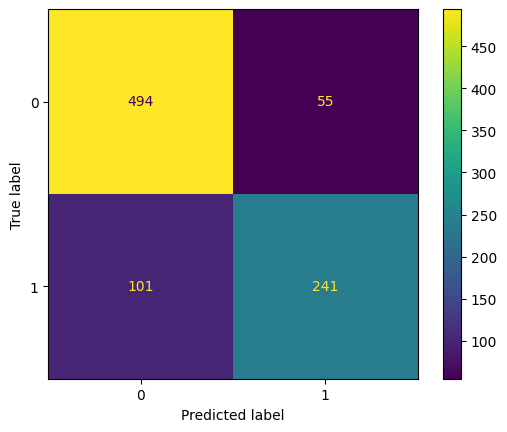

In [ ]:
# Realizando uma predição e plotando a matriz de confusão
y_treino_predito_ad_be = cross_val_predict(grid_search.best_estimator_, X_treino, y_treino, cv = 5)

matriz_confusao = confusion_matrix(y_treino, y_treino_predito_ad_be)
matriz_confusao = ConfusionMatrixDisplay(matriz_confusao)
matriz_confusao.plot()

In [ ]:
# Reportando as métricas de classificação
print(f'Classification report para Árvore de Decisão:\n {classification_report(y_treino, y_treino_predito_ad_be)}')

Classification report para Árvore de Decisão:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       549
           1       0.81      0.70      0.76       342

    accuracy                           0.82       891
   macro avg       0.82      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



# Tratando valores nulos e excluindo algumas variáveis nos dados de teste.

In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_teste_novo = df_teste.drop('Cabin', axis = 1)

In [ ]:
df_teste_novo.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
df_teste_novo['Age'].fillna(df_teste_novo['Age'].median(), inplace=True)

In [ ]:
df_teste_novo.drop('Embarked', axis = 1, inplace = True)

In [ ]:
df_teste_novo.drop('Ticket', axis = 1, inplace = True)

In [ ]:
df_teste_novo.drop('Name', axis = 1, inplace = True)

In [ ]:
df_teste_novo.drop('PassengerId', axis = 1, inplace = True)

In [ ]:
df_teste_novo['Fare'].fillna(df_teste_novo['Fare'].mean(), inplace=True)

In [ ]:
df_teste_novo['Sex'] = df_teste_novo['Sex'].map({'male': 1, 'female': 0})

In [ ]:
df_teste_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 19.7 KB


In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
X_teste = df_teste_novo

In [ ]:
X_treino.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [ ]:
X_teste.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


# Modelo final

In [ ]:
modelo_final = grid_search.best_estimator_

In [ ]:
predicao_final = modelo_final.predict(X_teste)

In [ ]:
submission  = pd.DataFrame({
    "PassengerId": df_teste["PassengerId"],
    "Survived": predicao_final
})
submission.to_csv("submission.csv", index=False)

Bem básico!